In [158]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy import optimize
from sklearn import linear_model

In [37]:
data = pd.read_csv('full_data.csv',parse_dates=True)

In [53]:
latest_day = data.date.values[-1]

In [166]:
data['death_rate']=data['total_deaths']/data['total_cases']
data['death_rate']=data['death_rate'].fillna(0)

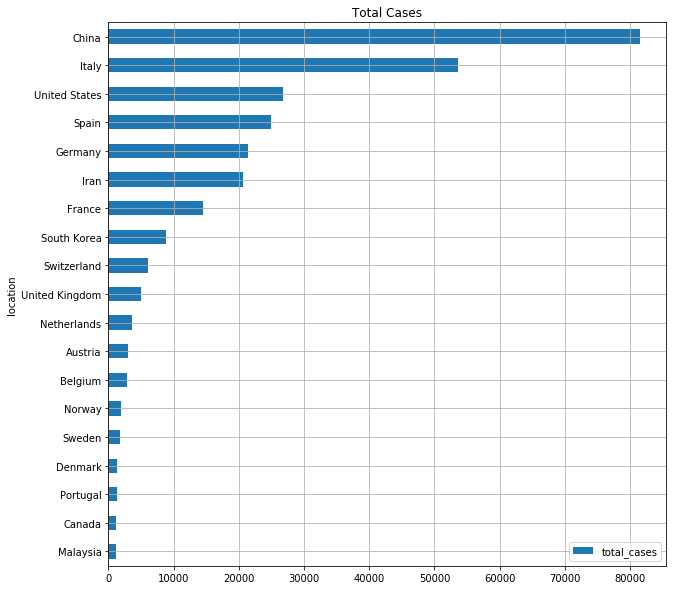

In [75]:
data[data.date == latest_day].sort_values(by = 'total_cases')[-20:-1].plot('location','total_cases',
                                                                           kind = 'barh',
                                                                          figsize = (10,10),
                                                                          grid = True,
                                                                          title = 'Total Cases');


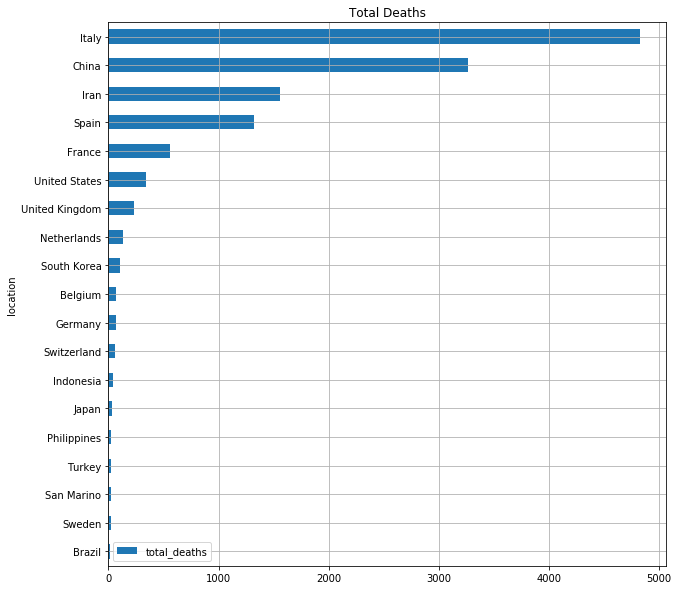

In [76]:
data[data.date == latest_day].sort_values(by = 'total_deaths')[-20:-1].plot('location','total_deaths',
                                                                           kind = 'barh',
                                                                          figsize = (10,10),
                                                                          grid = True,
                                                                          title = 'Total Deaths');


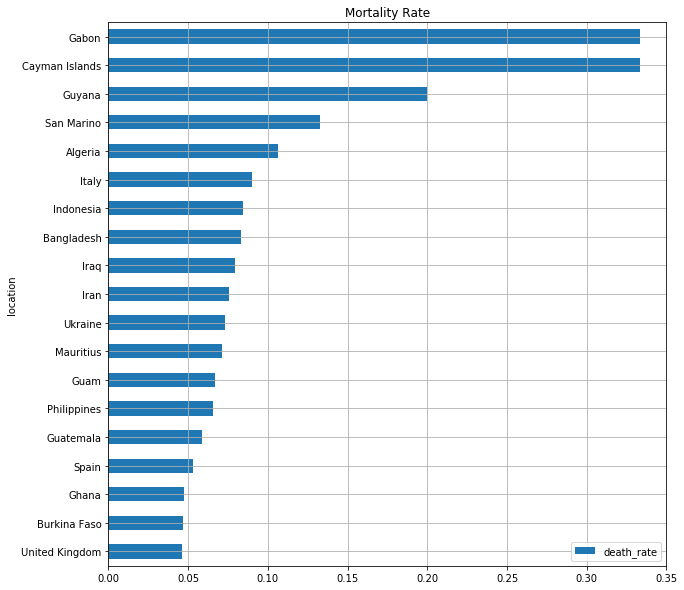

In [168]:
data[data.date == latest_day].sort_values(by = 'death_rate')[-20:-1].plot('location','death_rate',
                                                                           kind = 'barh',
                                                                          figsize = (10,10),
                                                                          grid = True,
                                                                          title = 'Mortality Rate');


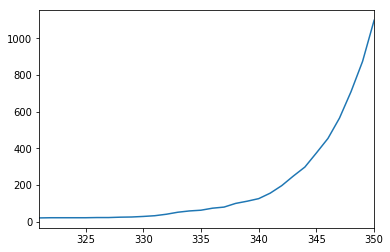

In [169]:
data[data.location=='Australia'].total_cases[-30:].plot(logy=False)

In [170]:
countries = [c for c in data.location.unique() if c!='World']

In [171]:
growth100 = {}
n_start = 100
for country in countries:
    cases = data[data.location == country].total_cases.values
    idx = np.argmin(np.abs(cases-n_start))
    cases_from100 = cases[idx:]
    growth100.update({country:cases_from100})

(0, 30)

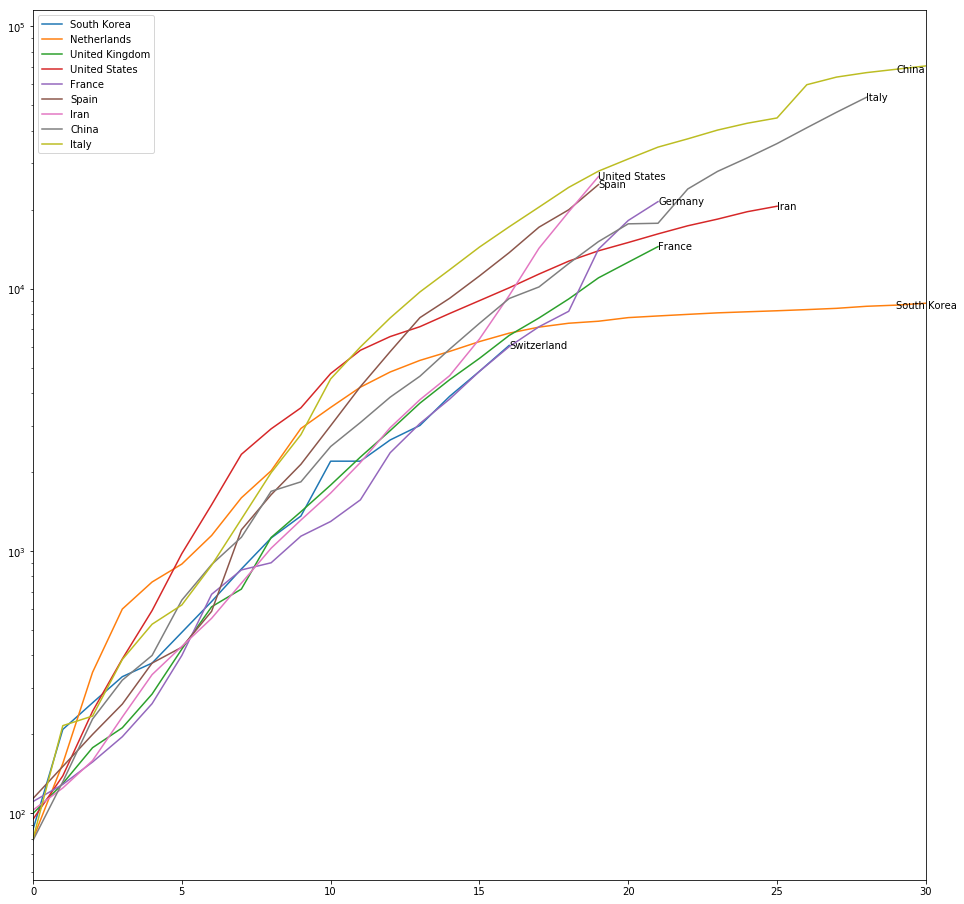

In [172]:
xmax = 30

top_countries_cases = data[data.date == latest_day].sort_values(by = 'total_cases')[-10:-1].location
top_countries_deaths = data[data.date == latest_day].sort_values(by = 'total_deaths')[-10:-1].location
countries_list = top_countries_deaths
plt.figure(figsize=(16,16))
for country in top_countries:
    y = growth100[country]
    if len(y)>xmax:
        xloc = xmax
    else:
        xloc = len(y)
    plt.semilogy(y)
    plt.annotate(s=country,xy = (xloc-1,y[xloc-1]), xytext=(0,0),textcoords='offset points', va='center')
#     plt.annotate(xy=(x[-1],y[-1]), xytext=(5,0), textcoords='offset points', text=l, va='center')
plt.legend(countries_list)
plt.xlim((0,xmax))

In [173]:
death20 = {}
n_start = 20
for country in countries:
    deaths = data[data.location == country].total_deaths.values
    idx = np.argmin(np.abs(deaths-n_start))
    deaths_from20 = deaths[idx:]
    death20.update({country:deaths_from20})

(0, 30)

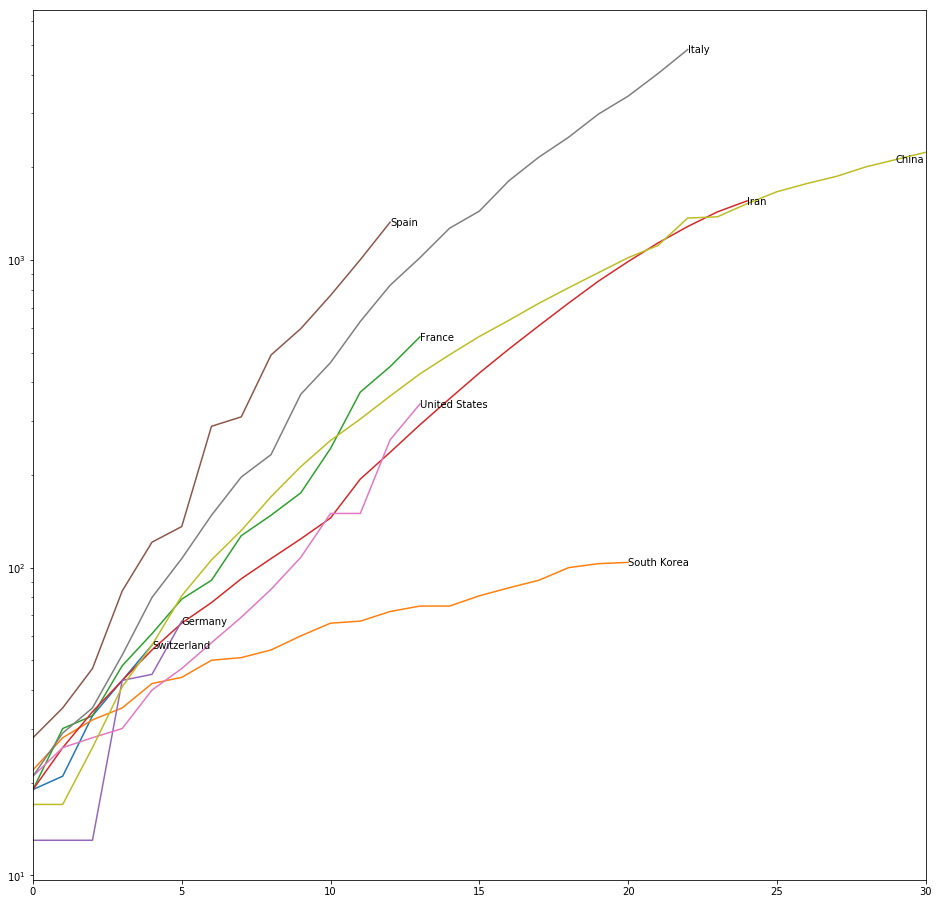

In [174]:
xmax = 30

top_countries_cases = data[data.date == latest_day].sort_values(by = 'total_cases')[-10:-1].location
top_countries_deaths = data[data.date == latest_day].sort_values(by = 'total_deaths')[-10:-1].location


countries_list = top_countries_deaths
plt.figure(figsize=(16,16))
for country in top_countries:
    y = death20[country]
    if len(y)>xmax:
        xloc = xmax
    else:
        xloc = len(y)
    plt.semilogy(y)
    plt.annotate(s=country,xy = (xloc-1,y[xloc-1]), xytext=(0,0),textcoords='offset points', va='center')
#     plt.annotate(xy=(x[-1],y[-1]), xytext=(5,0), textcoords='offset points', text=l, va='center')
# plt.legend(countries_list)
plt.xlim((0,xmax))


# Exponential Growth

In [160]:
ndays = 7 


In [216]:
m = linear_model.LinearRegression()
ndays = 7 
eps = 1e-4
for country in countries:
#     print(country,)
    cases = data[data.location==country]['total_cases'].values[-ndays:]
    deaths = data[data.location==country]['total_deaths'].values[-ndays:]
    x = np.arange(ndays)[:,None]
    if (not len(x)==len(cases)) or cases.min()==0 or cases[-1]<20:
        continue
#     print(x.shape,cases.shape)
    m.fit(x,np.log(cases))
    sr_cases = m.coef_[0]
    dt_cases = np.log(2)/(sr_cases+eps)
    score = m.score(x,np.log(cases))
    if deaths.min()==0:
        sr_deaths = np.nan
        dt_deaths = np.nan
    else:
        m.fit(x,np.log(deaths))
        sr_deaths = m.coef_[0]
        dt_deaths = np.log(2)/(sr_deaths+eps)
    print(f'{country[:20]:20}{sr_cases:12.4f}{sr_deaths:12.4f}{dt_cases:12.4f}{dt_deaths:12.4f}{score:12.4f}')
    

Afghanistan               0.0530         nan     13.0584         nan      0.6924
Albania                   0.0948      0.1485      7.3059      4.6635      0.9526
Algeria                   0.1152      0.1756      6.0099      3.9442      0.9560
Andorra                   0.4871         nan      1.4227         nan      0.8823
Argentina                 0.2297      0.1177      3.0165      5.8837      0.9862
Armenia                   0.2640         nan      2.6245         nan      0.8979
Australia                 0.2161      0.0666      3.2062     10.3927      0.9996
Austria                   0.2210      0.2971      3.1346      2.3325      0.9924
Azerbaijan                0.1860         nan      3.7238         nan      0.9479
Bahrain                   0.0610         nan     11.3436         nan      0.9942
Bangladesh                0.3182         nan      2.1778         nan      0.9593
Belarus                   0.1601         nan      4.3263         nan      0.9611
Belgium                   0.

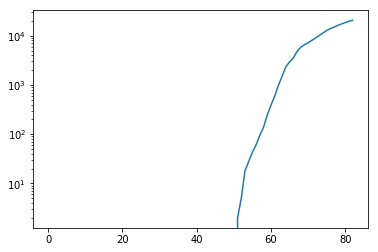

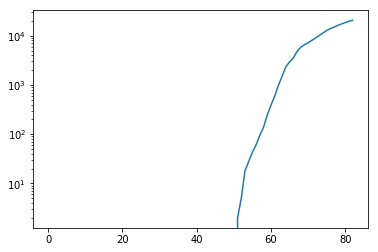

In [215]:

start = 0
end = 90
country = 'Iran'
plt.semilogy(data[data.location==country].total_cases.values)
plt.figure()
plt.semilogy(data[data.location==country].total_cases.values[start:end])


      fun: 2985734850.7822356
 hess_inv: array([[ 1.18800732e-04, -5.37614204e-08],
       [-5.37614204e-08,  2.43288932e-11]])
      jac: array([-3.3696000e+04, -7.4463872e+07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 311
      nit: 6
     njev: 75
   status: 2
  success: False
        x: array([ 3.81069047e+01, -1.50263601e-02])
      fun: 2237378.613091435
 hess_inv: array([[ 1.13165722e-06, -1.15487506e-09, -1.88532752e-06],
       [-1.15487506e-09,  3.91158387e-12,  1.92217628e-09],
       [-1.88532752e-06,  1.92217628e-09,  3.14093493e-06]])
      jac: array([9.6875000e-01, 7.8678125e+02, 3.1250000e-02])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 27
     njev: 135
   status: 2
  success: False
        x: array([9.38502665e+00, 2.24911151e-01, 8.10004134e+04])


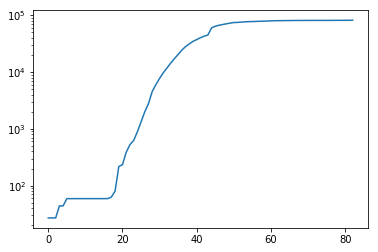

In [157]:
y = data[data.location==country].total_cases.values[start:end]
x = np.arange(len(y))
result1=fit_curve(exponential_growth,x,y,[y[0],1])
result2=fit_curve(logistic_growth,x,y,[y[0],1,y[-1]])
print(result1)
print(result2)
plt.semilogy(x,y)

In [138]:
def logistic_growth(x,k):
    P0 = k[0]
    r = k[1]
    Pmax = k[2]
    return Pmax/(1+(Pmax-P0)/P0*sp.exp(-r*x))

def exponential_growth(x,k):
    P0 = k[0]
    r = k[1]
    return P0*sp.exp(r*x)

def fit_curve(func,xdata,ydata,inital_params):

    def obj_func(params):
        yhat = func(xdata,params)
        return np.mean((ydata-yhat)**2)
    params = optimize.minimize(obj_func,inital_params)
    return params

In [140]:
x = np.array([1,2,3,4])
y = np.array([1,2,5,7])

In [142]:
result = fit_curve(exponential_growth,x,y,[1,1])

In [144]:
result.x

array([0.78943128, 0.55513388])